In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'e6a33c98-9b07-4e1c-9062-ed2c2da7f020',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2025-07-18T08:19:15.026Z', 'error_code': 0, 'error_message': None, 'elapsed': 27, 'credit_count': 1, 'notice': None, 'total_count': 9380}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12259, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [3]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [4]:
#This normalizes data and puts it in a structured dataframe
df = pd.json_normalize(data['data'])

#Adds a column with data stamps starting from the present
df['Timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,12259,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.989392e+07,1.989392e+07,False,NaN,1,NaN,NaN,None,2025-07-18T08:17:00.000Z,119338.919782,5.323563e+10,-27.3173,-0.614699,0.970723,1.240138,13.407232,15.631427,40.235467,2.374118e+12,60.8028,2.506117e+12,None,2025-07-18T08:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-18 10:19:26.908892
1,1027,Ethereum,ETH,ethereum,10399,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207126e+08,1.207126e+08,True,NaN,2,NaN,NaN,None,2025-07-18T08:18:00.000Z,3625.960558,5.623184e+10,8.7762,-0.482041,5.265084,21.571774,42.558500,50.197306,126.766791,4.376992e+11,11.2127,4.376992e+11,None,2025-07-18T08:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-18 10:19:26.908892
2,52,XRP,XRP,xrp,1653,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.918219e+10,9.998593e+10,False,NaN,3,NaN,NaN,None,2025-07-18T08:18:00.000Z,3.490640,2.324191e+10,107.9620,-1.019140,10.472197,34.655268,61.146328,51.525254,67.372952,2.065837e+11,5.2908,3.490640e+11,None,2025-07-18T08:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-18 10:19:26.908892
3,825,Tether USDt,USDT,tether,137377,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.602613e+11,1.638173e+11,True,NaN,4,NaN,NaN,None,2025-07-18T08:17:00.000Z,1.000673,1.661125e+11,12.9567,-0.006351,0.037561,0.034474,0.030840,0.034522,0.098830,1.603691e+11,4.1072,1.639275e+11,None,2025-07-18T08:17:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-07-18 10:19:26.908892
4,1839,BNB,BNB,bnb,2624,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.392891e+08,1.392891e+08,False,NaN,5,NaN,NaN,None,2025-07-18T08:18:00.000Z,740.298875,2.877389e+09,3.5286,-0.633572,2.823576,7.911580,13.540065,15.813437,25.140811,1.031155e+11,2.6409,1.031155e+11,None,2025-07-18T08:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-18 10:19:26.908892
5,5426,Solana,SOL,solana,954,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.378031e+08,6.054634e+08,True,NaN,6,5.252369e+08,9.520875e+10,None,2025-07-18T08:18:00.000Z,181.268210,9.128574e+09,0.0913,-0.983726,4.502288,10.705730,22.395444,12.072746,30.859745,9.748660e+10,2.4967,1.097513e+11,None,2025-07-18T08:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-18 10:19:26.908892
6,3408,USDC,USDC,usd-coin,29562,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.448473e+10,6.448473e+10,False,NaN,7,6.090122e+10,6.089607e+10,None,2025-07-18T08:18:00.000Z,0.999915,2.609991e+10,35.6305,-0.003433,0.004779,0.008541,-0.046220,0.000781,0.007742,6.447927e+10,1.6514,6.447927e+10,None,2025-07-18T08:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-07-18 10:19:26.908892
7,74,Dogecoin,DOGE,dogecoin,1257,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.501439e+11,1.501439e+11,True,NaN,8,NaN,NaN,None,2025-07-18T08:17:00.000Z,0.240065,5.501883e+09,63.1846,-1.302832,12.816313,21.984135,40.011455,10.518549,51.213920,3.604434e+10,0.9231,3.604434e+10,None,2025-07-18T08:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-18 10:19:26.908892
8,1958,TRON,TRX,tron,1202,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, l

In [5]:
import os
import json
import pandas as pd
from requests import Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects

def api_runner():
    global df

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start': '1',
        'limit': '15',
        'convert': 'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': 'e6a33c98-9b07-4e1c-9062-ed2c2da7f020',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        print("Data fetched successfully")
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print("Error fetching API data:", e)
        return  # exit function if error

    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')

    # Combine with previous data if it exists
    if 'df' in globals():
        df = pd.concat([df, df2], ignore_index=True)
    else:
        df = df2

    # File save path
    file_path = r'C:\Users\mehdi\OneDrive\Bureau\Data Analyst - courses\Project - crypto API\Crypto_API.csv'

    # Save the data
    if not os.path.isfile(file_path):
        df.to_csv(file_path, index=False)
    else:
        df2.to_csv(file_path, mode='a', header=False, index=False)  # only append new rows

    print("Data saved to CSV successfully.")

In [6]:
import os
from time import time
from time import sleep

for i in range(333):
  api_runner()
  print('API runner completed succesfully')
  sleep(3600) #sleep for 1 hour
exit()

Data fetched successfully
Data saved to CSV successfully.
API runner completed succesfully
Data fetched successfully
Data saved to CSV successfully.
API runner completed succesfully
Data fetched successfully
Data saved to CSV successfully.
API runner completed succesfully


KeyboardInterrupt: 

In [7]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,12258,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.989364e+07,1.989364e+07,False,NaN,1,NaN,NaN,None,2025-07-17T15:25:00.000Z,118628.059206,7.174777e+10,-3.7867,0.112558,-0.473490,6.616286,13.588388,12.601520,40.469426,2.359944e+12,61.8700,2.491189e+12,None,2025-07-17T15:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-17 17:26:03.666642
1,1027,Ethereum,ETH,ethereum,10399,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.207135e+08,1.207135e+08,True,NaN,2,NaN,NaN,None,2025-07-17T15:25:00.000Z,3415.810592,5.306685e+10,33.3278,0.130827,5.838730,23.228646,36.285798,33.367392,115.663847,4.123345e+11,10.8101,4.123345e+11,None,2025-07-17T15:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-17 17:26:03.666642
2,52,XRP,XRP,xrp,1653,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.913163e+10,9.998595e+10,False,NaN,3,NaN,NaN,None,2025-07-17T15:25:00.000Z,3.229596,1.419178e+10,108.3565,-0.232741,8.566947,32.312824,48.472185,32.824611,56.552943,1.909713e+11,5.0066,3.229596e+11,None,2025-07-17T15:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-17 17:26:03.666642
3,825,Tether USDt,USDT,tether,137284,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.602613e+11,1.638173e+11,True,NaN,4,NaN,NaN,None,2025-07-17T15:24:00.000Z,1.000067,1.490860e+11,18.5954,-0.007691,-0.023155,-0.042495,-0.026330,-0.005810,0.018616,1.602720e+11,4.2018,1.638283e+11,None,2025-07-17T15:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-07-17 17:26:03.666642
4,1839,BNB,BNB,bnb,2623,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.392891e+08,1.392891e+08,False,NaN,5,NaN,NaN,None,2025-07-17T15:25:00.000Z,723.092144,2.986351e+09,49.0292,-0.402332,3.262722,8.131915,11.621907,11.060404,21.792614,1.007189e+11,2.6405,1.007189e+11,None,2025-07-17T15:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-17 17:26:03.666642
5,5426,Solana,SOL,solana,954,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.378192e+08,6.054641e+08,True,NaN,6,5.252369e+08,9.126602e+10,None,2025-07-17T15:24:00.000Z,173.761623,9.185354e+09,38.2391,-0.163644,4.158981,11.099261,17.722255,-0.411229,30.770204,9.345233e+10,2.4500,1.052064e+11,None,2025-07-17T15:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-17 17:26:03.666642
6,3408,USDC,USDC,usd-coin,29537,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,6.345692e+10,6.345692e+10,False,NaN,7,6.090122e+10,6.088201e+10,None,2025-07-17T15:24:00.000Z,0.999685,2.009116e+10,29.2949,0.000951,-0.029087,-0.030323,-0.041792,-0.012411,-0.026719,6.343690e+10,1.6631,6.343690e+10,None,2025-07-17T15:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-07-17 17:26:03.666642
7,74,Dogecoin,DOGE,dogecoin,1257,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.501345e+11,1.501345e+11,True,NaN,8,NaN,NaN,None,2025-07-17T15:25:00.000Z,0.212557,3.708209e+09,84.1291,0.078114,5.083968,18.221701,26.240041,-8.469373,36.246993,3.191219e+10,0.8366,3.191219e+10,None,2025-07-17T15:25:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-17 17:26:03.666642
8,1958,TRON,TRX,tron,1202,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosyst

In [7]:
df72 = pd.read_csv(r'C:\Users\mehdi\OneDrive\Bureau\Data Analyst - courses\Project - crypto API\Crypto_API.csv')
df72

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,12258,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.989362e+07,1.989362e+07,False,NaN,1,NaN,NaN,NaN,2025-07-17T14:07:00.000Z,118359.472248,7.339746e+10,-3.0723,0.342132,-0.308621,6.684299,12.394809,13.072804,39.970073,2.354598e+12,61.7216,2.485549e+12,NaN,2025-07-17T14:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-17 16:09:32.815414
1,1027,Ethereum,ETH,ethereum,10399,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.207135e+08,1.207135e+08,True,NaN,2,NaN,NaN,NaN,2025-07-17T14:08:00.000Z,3417.516827,5.504515e+10,45.4292,-0.271966,7.106065,22.765006,33.497821,34.730346,114.619019,4.125405e+11,10.8140,4.125405e+11,NaN,2025-07-17T14:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-17 16:09:32.815414
2,52,XRP,XRP,xrp,1652,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.913163e+10,9.998595e+10,False,NaN,3,NaN,NaN,NaN,2025-07-17T14:08:00.000Z,3.237012,1.450665e+10,119.1312,-0.766865,8.651595,33.437879,46.171823,34.526086,55.743461,1.914098e+11,5.0175,3.237012e+11,NaN,2025-07-17T14:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-17 16:09:32.815414
3,825,Tether USDt,USDT,tether,137275,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,1.602613e+11,1.638173e+11,True,NaN,4,NaN,NaN,NaN,2025-07-17T14:07:00.000Z,1.000079,1.523152e+11,21.9525,0.000138,0.000286,-0.044192,-0.008128,-0.012068,0.017565,1.602740e+11,4.2013,1.638303e+11,NaN,2025-07-17T14:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-07-17 16:09:32.815414
4,1839,BNB,BNB,bnb,2623,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.392891e+08,1.392891e+08,False,NaN,5,NaN,NaN,NaN,2025-07-17T14:07:00.000Z,723.900012,3.015648e+09,55.0934,0.622849,4.294387,8.062498,10.942665,11.608954,22.173652,1.008314e+11,2.6431,1.008314e+11,NaN,2025-07-17T14:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-17 16:09:32.815414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,32196,Hyperliquid,HYPE,hyperliquid,117,2024-07-15T10:14:50.000Z,"['decentralized-exchange-dex-token', 'defi', '...",1.000000e+09,3.339282e+08,9.999939e+08,False,NaN,11,3.339317e+08,1.547747e+10,NaN,2025-07-18T08:19:00.000Z,46.349220,6.041394e+08,32.9175,-0.242832,-0.239204,2.126142,14.456317,77.170426,155.734309,1.547731e+10,0.3964,4.634922e+10,NaN,2025-07-18T08:19:00.000Z,32196.0,Hyperliquid,HYPE,hyperliquid,0x0d01dc56dcaaca66ad901c959b4011ec,2025-07-18 10:21:44.347750
1271,512,Stellar,XLM,stellar,726,2014-08-05T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",5.000181e+10,3.109354e+10,5.000179e+10,False,NaN,12,3.143541e+10,1.522213e+10,NaN,2025-07-18T08:20:00.000Z,0.484235,2.218162e+09,36.1002,-1.537350,3.959845,57.977098,91.159304,72.833344,96.100614,1.505658e+10,0.3856,2.421263e+10,NaN,2025-07-18T08:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-18 10:21:44.347750
1272,20947,Sui,SUI,sui,713,2022-07-12T08:03:11.000Z,"['binance-launchpool', 'coinbase-ventures-port...",1.000000e+10,3.455015e+09,1.000000e+10,False,NaN,13,3.455015e+09,1.411532e+10,NaN,2025-07-18T08:20:00.000Z,4.085458,2.898725e+09,53.4492,-0.290384,2.032624,17.078880,44.837830,10.461173,90.422

In [9]:
pd.set_option('display.float_format', lambda x: '%5f' % x)

In [10]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,12259,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.000000,19893915.000000,19893915.000000,False,NaN,1,NaN,NaN,None,2025-07-18T08:17:00.000Z,119338.919782,53235630314.590675,-27.317300,-0.614699,0.970723,1.240138,13.407232,15.631427,40.235467,2374118326334.318848,60.802800,2506117315421.359863,None,2025-07-18T08:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-18 10:19:26.908892
1,1027,Ethereum,ETH,ethereum,10399,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120712631.236103,120712631.236103,True,NaN,2,NaN,NaN,None,2025-07-18T08:18:00.000Z,3625.960558,56231841748.691383,8.776200,-0.482041,5.265084,21.571774,42.558500,50.197306,126.766791,437699239767.106018,11.212700,437699239767.109985,None,2025-07-18T08:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-18 10:19:26.908892
2,52,XRP,XRP,xrp,1653,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.000000,59182189917.000000,99985925712.000000,False,NaN,3,NaN,NaN,None,2025-07-18T08:18:00.000Z,3.490640,23241909844.364166,107.962000,-1.019140,10.472197,34.655268,61.146328,51.525254,67.372952,206583747686.044678,5.290800,349064047774.789978,None,2025-07-18T08:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-18 10:19:26.908892
3,825,Tether USDt,USDT,tether,137377,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,160261289852.802979,163817320293.716187,True,NaN,4,NaN,NaN,None,2025-07-18T08:17:00.000Z,1.000673,166112512789.676086,12.956700,-0.006351,0.037561,0.034474,0.030840,0.034522,0.098830,160369091287.808655,4.107200,163927513729.839996,None,2025-07-18T08:17:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-07-18 10:19:26.908892
4,1839,BNB,BNB,bnb,2624,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,139289076.300000,139289076.300000,False,NaN,5,NaN,NaN,None,2025-07-18T08:18:00.000Z,740.298875,2877389369.560846,3.528600,-0.633572,2.823576,7.911580,13.540065,15.813437,25.140811,103115546492.510071,2.640900,103115546492.509995,None,2025-07-18T08:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-18 10:19:26.908892
5,5426,Solana,SOL,solana,954,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,537803097.783668,605463390.801587,True,NaN,6,525236893.300000,95208751361.063293,None,2025-07-18T08:18:00.000Z,181.268210,9128574255.765215,0.091300,-0.983726,4.502288,10.705730,22.395444,12.072746,30.859745,97486604751.598877,2.496700,109751264940.429993,None,2025-07-18T08:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-07-18 10:19:26.908892
6,3408,USDC,USDC,usd-coin,29562,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,64484726358.152100,64484726358.152100,False,NaN,7,60901219650.230003,60896065239.250282,None,2025-07-18T08:18:00.000Z,0.999915,26099905721.454781,35.630500,-0.003433,0.004779,0.008541,-0.046220,0.000781,0.007742,64479268654.948883,1.651400,64479268654.949997,None,2025-07-18T08:18:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-07-18 10:19:26.908892
7,74,Dogecoin,DOGE,dogecoin,1257,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,150143916383.705261,150143916383.705261,True,NaN,8,NaN,NaN,None,2025-07-18T08:17:00.00

In [12]:
# Filter only Bitcoin and Ethereum
filtered_df = df[df['name'].isin(['Bitcoin', 'Ethereum'])]

# Group and calculate the average for the selected columns
df3 = filtered_df.groupby('name', sort=False)[[
    'quote.USD.percent_change_1h',
    'quote.USD.percent_change_24h',
    'quote.USD.percent_change_7d',
    'quote.USD.percent_change_30d',
    'quote.USD.percent_change_90d'
]].mean()

df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_90d
name,,,,,
Bitcoin,-0.573757,0.978193,1.253604,13.443585,40.260371
Ethereum,-0.441229,5.278825,21.583768,42.602799,126.734033


In [13]:
df4 = df3.stack()
df4

name                                  
Bitcoin   quote.USD.percent_change_1h     -0.573757
          quote.USD.percent_change_24h     0.978193
          quote.USD.percent_change_7d      1.253604
          quote.USD.percent_change_30d    13.443585
          quote.USD.percent_change_90d    40.260371
Ethereum  quote.USD.percent_change_1h     -0.441229
          quote.USD.percent_change_24h     5.278825
          quote.USD.percent_change_7d     21.583768
          quote.USD.percent_change_30d    42.602799
          quote.USD.percent_change_90d   126.734033
dtype: float64

In [14]:
type(df4)

pandas.core.series.Series

In [15]:
df5 = df4.to_frame(name='values')
df5

values
name                                            
Bitcoin  quote.USD.percent_change_1h   -0.573757
         quote.USD.percent_change_24h   0.978193
         quote.USD.percent_change_7d    1.253604
         quote.USD.percent_change_30d  13.443585
         quote.USD.percent_change_90d  40.260371
Ethereum quote.USD.percent_change_1h   -0.441229
         quote.USD.percent_change_24h   5.278825
         quote.USD.percent_change_7d   21.583768
         quote.USD.percent_change_30d  42.602799
         quote.USD.percent_change_90d 126.734033

In [16]:
type(df5)

pandas.core.frame.DataFrame

In [17]:
df5.count()

values    10
dtype: int64

In [21]:
index = pd.Index(range(10))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.573757
1,Bitcoin,quote.USD.percent_change_24h,0.978193
2,Bitcoin,quote.USD.percent_change_7d,1.253604
3,Bitcoin,quote.USD.percent_change_30d,13.443585
4,Bitcoin,quote.USD.percent_change_90d,40.260371
5,Ethereum,quote.USD.percent_change_1h,-0.441229
6,Ethereum,quote.USD.percent_change_24h,5.278825
7,Ethereum,quote.USD.percent_change_7d,21.583768
8,Ethereum,quote.USD.percent_change_30d,42.602799
9,Ethereum,quote.USD.percent_change_90d,126.734033


In [25]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.573757
1,Bitcoin,quote.USD.percent_change_24h,0.978193
2,Bitcoin,quote.USD.percent_change_7d,1.253604
3,Bitcoin,quote.USD.percent_change_30d,13.443585
4,Bitcoin,quote.USD.percent_change_90d,40.260371
5,Ethereum,quote.USD.percent_change_1h,-0.441229
6,Ethereum,quote.USD.percent_change_24h,5.278825
7,Ethereum,quote.USD.percent_change_7d,21.583768
8,Ethereum,quote.USD.percent_change_30d,42.602799
9,Ethereum,quote.USD.percent_change_90d,126.734033


In [29]:
df7['percent_change'] = df7['percent_change'].replace({
    'quote.USD.percent_change_1h': '1h',
    'quote.USD.percent_change_24h': '24h',
    'quote.USD.percent_change_7d': '7d',
    'quote.USD.percent_change_30d': '30d',
    'quote.USD.percent_change_90d': '90d'
})
df7

,name,percent_change,values
0,Bitcoin,1h,-0.573757
1,Bitcoin,24h,0.978193
2,Bitcoin,7d,1.253604
3,Bitcoin,30d,13.443585
4,Bitcoin,90d,40.260371
5,Ethereum,1h,-0.441229
6,Ethereum,24h,5.278825
7,Ethereum,7d,21.583768
8,Ethereum,30d,42.602799
9,Ethereum,90d,126.734033


In [23]:
import seaborn as sns 
import matplotlib.pyplot as plt

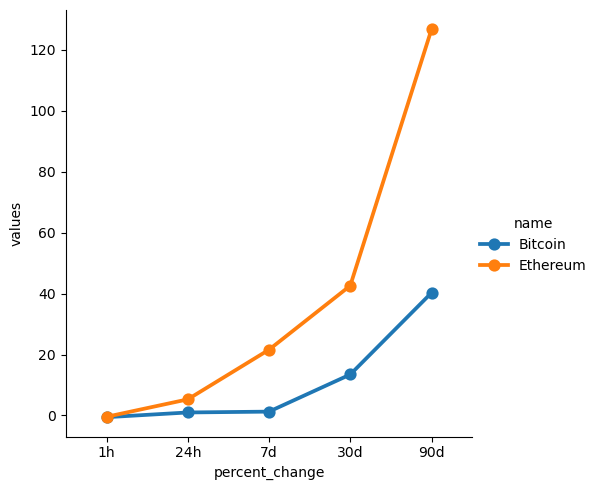

In [30]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [33]:
print(df.columns)

Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply',
       'infinite_supply', 'platform', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address', 'Timestamp'],
      dtype='object')


In [35]:
df10 = df[['name', 'quote.USD.price', 'Timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,Timestamp
0,Bitcoin,119338.919782,2025-07-18 10:19:26.908892
15,Bitcoin,119338.919782,2025-07-18 10:19:43.970727
30,Bitcoin,119424.997449,2025-07-18 10:20:44.149986
45,Bitcoin,119424.997449,2025-07-18 10:21:44.347750


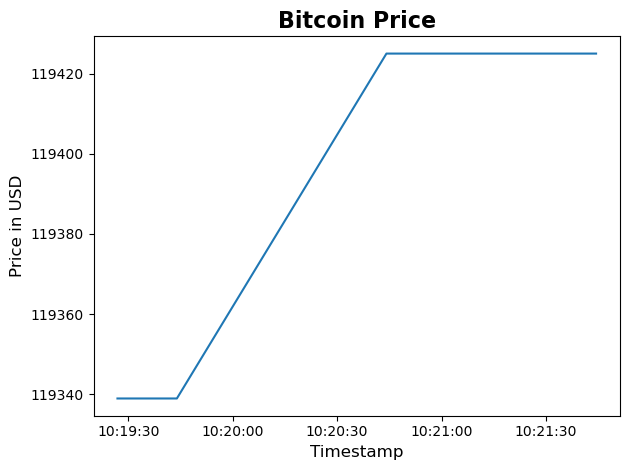

In [39]:
sns.lineplot(x='Timestamp', y='quote.USD.price', data=df10)

# Add title and labels
plt.title('Bitcoin Price', fontsize=16, fontweight='bold')
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)

# Tight layout to avoid cutting labels
plt.tight_layout()

# Show the plot
plt.show()